In [18]:
import numpy as np
import matplotlib.pyplot as plt

## 编程 3.2-1

In [19]:
def coef(points): #函数嵌套迭代
    if len(points) == 1:
        return points[0, 1]
    return (coef(points[1:]) - coef(points[:-1])) / (points[-1, 0] - points[0, 0])

def Newton(point):
    points = np.array(point)
    n = len(points)
    coef_array = np.zeros(n)

    for i in range(n):
        coef_array[i] = coef(points[:i+1])
    
    def f(x):
        y = 0
        for i in range(n):
            x_i = 1
            for k in range(0, i):
                x_i *= (x - points[k, 0])
            y += coef_array[i] * x_i
        return y
    
    return f,coef_array

## (a)

In [20]:
points=np.array([[0.6,1.433329],
                 [0.7,1.632316],
                 [0.8,1.896481],
                 [0.9,2.247908],
                 [1.0,2.718282]])

P=Newton(points)
Px=P[0]
print('系数为：',P[1])

系数为： [1.433329   1.98987    3.2589     3.68066667 4.00041667]


## (b)

In [21]:
print(Px(0.82))
print(Px(0.98))

1.9589097744
2.6128479663999995


## (c)

$$(e^{x^2})^{(5)}=(120+160x^3+32x^5)e^{x^2}$$

In [22]:
def eub(x):
    return np.abs((x-0.6)*(x-0.7)*(x-0.8)*(x-0.9)*(x-1.0)/(1*2*3*4*5)*(120+160+32)*np.e)

def error(x):
    return np.abs(np.exp(x**2)-Px(x))

print('误差上界',eub(0.82),'实际误差：',error(0.82))
print('误差上界',eub(0.98),'实际误差：',error(0.98))

误差上界 5.373586503516332e-05 实际误差： 2.3348514214704963e-05
误差上界 0.00021657181968717419 实际误差： 0.00010660542393381434


## (d)

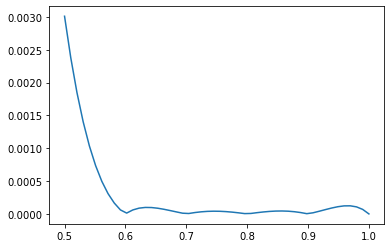

In [24]:
x=np.linspace(0.5,1)
y=error(x)
plt.plot(x,y)

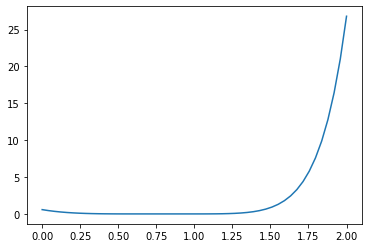

In [25]:
x=np.linspace(0,2)
y=error(x)
plt.plot(x,y)